
## Задание - кластеризация

Кластеризация — разбиение выборки объектов на кластеры таким образом, чтобы объекты в кластере были похожи друг на друга, а объекты из разных кластеров - отличались. 

# Задание: 
1. Реализовать методы кластеризации: k-means (3 балла), комментировать подробно код. Визуализировать каждую итерацию алгоритма. 
2. Предложить модификации k-means(7 баллов)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# функция расчета евклидовой метрики
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Реализуем основной цикл алгоритма.

In [ ]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

Функция визуализации

In [ ]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

Проверка реализованного алгоритма кластеризации на классическом наборе данных ```Iris```

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['target']=iris.target
X_iris_df = iris_df.drop('target', axis=1)
y_iris_df = iris_df.target

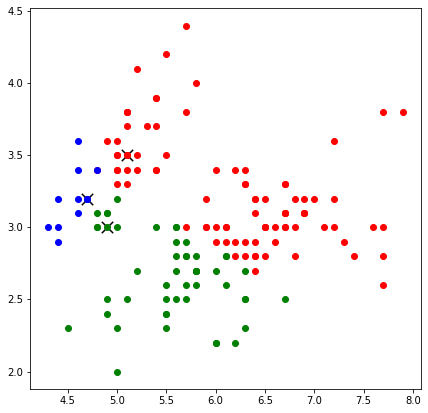

Time of work:
0.6371479034423828


In [ ]:

n_clusters = 3
max_iterations = 1
min_distance = 1e-4
start = time.time();
centroids, clusters = kmeans(X_iris_df.to_numpy(), n_clusters, max_iterations, min_distance)
visualize(centroids, clusters)
finish = time.time();
print("Time of work:\n{}".format(finish-start))

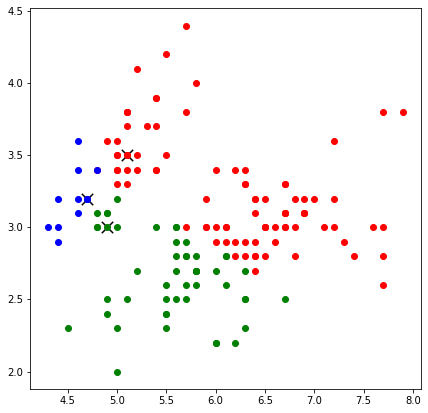

Time of work:
0.6618902683258057


In [ ]:
import time

n_clusters = 3
max_iterations = 1
min_distance = 1e-4
start = time.time();
centroids, clusters = kmeans(X_iris_df.to_numpy(), n_clusters, max_iterations, min_distance)
visualize(centroids, clusters)
finish = time.time();
print("Time of work:\n{}".format(finish-start))

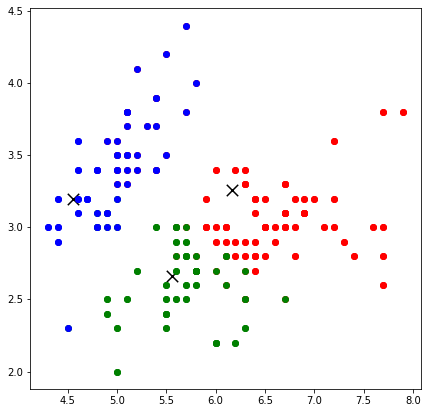

Time of work:
1.2094364166259766


In [ ]:
n_clusters = 3
max_iterations = 2
min_distance = 1e-4
start = time.time();
centroids, clusters = kmeans(X_iris_df.to_numpy(), n_clusters, max_iterations, min_distance)
visualize(centroids, clusters)
finish = time.time();
print("Time of work:\n{}".format(finish-start))

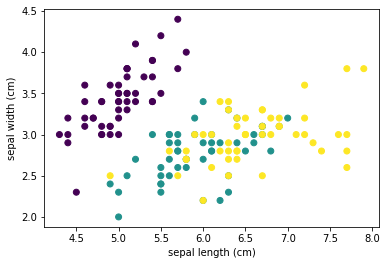

In [ ]:
# Разделение набора данных
x_axis = iris.data[:, 0]  # Sepal Length
y_axis = iris.data[:, 1]  # Sepal Width

# Построение
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris.target)
plt.show()

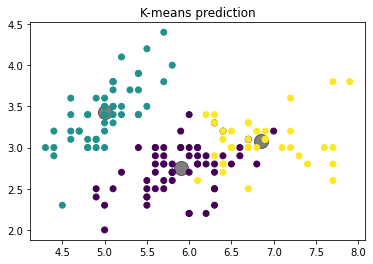

Time of work:
0.19651532173156738


In [ ]:
from sklearn.cluster import KMeans
start = time.time();
k_means = KMeans(n_clusters=3, algorithm='full')
k_means.fit(X_iris)


# Построение
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.scatter(x_axis, y_axis, c = k_means.labels_)
plt.title('K-means prediction')
plt.show()
finish = time.time();
print("Time of work:\n{}".format(finish-start))

In [ ]:
mapping = {0: 1, 1: 0, 2: 2}
mapped = [mapping[m] for m in k_means.labels_]
mapped = np.asarray(mapped)
mapped

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
y_iris_df.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Ответить на вопросы


* 1. Приведите примеры каких прикладных задач, где Вы бы стали использовать методы кластеризации?

**Ответ**

> Задачи связанные с выявлением шаблонов, выделением групп людей, сегмантацией изображений, анализом текстов

* 2. Напишите недостатки алгоритмов кластеризации: kmeans, dbscan, агломеративная кластеризация?

**Ответ**

> Два основных недостатка метода **kmeans** заключаются в чувствительности к «выбросам» и начальному выбору центров тяжести. Количество кластеров является параметром алгоритма.

> Главные недостатки **DBSCAN** — неспособность соединять кластеры через проёмы, и, наоборот, способность связывать явно различные кластеры через плотно населённые перемычки

> Агломеративная кластеризация: работает только на числовых данных.

* 3. Пусть мы имеем массив текстовых документов и необходимо кластеризовать эти документы по тематикам - еда, спорт, красота, кино и так далее. Размеченной выборки у Вас нет, только сами тексты документов. Какие алгоритмы кластеризации и какие признаки Вы бы использовали для решения данной задачи?

**Ответ**

> Можно использовать алгоритм ```kmeans``` или ```Агломеративную кластеризацию```. В качестве признаков можно взять частоты встречающихся слов в каждой категории.

* 4. Пусть часть данных текстов была размечена, но большая часть так и осталась целевой переменной. Как бы Вы использовать эти данные для улучшения качества кластеризации?

**Ответ**

> Так как некоторые тексты уже размечены. То часто встречающиеся слова из этих тестов можно причислить к определенным темам. С помощью них можно определять классы.